In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from funciones import *
import numpy.linalg as npla
from scipy.linalg import norm
import matplotlib.pyplot as plt

### **Consigna 1**


Tenemos que probar que 
$$
(I - A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots => \lim_{n \to \infty} A^{n+1} = 0
$$

Empecemos viendo la siguiente igualdad:

$$
(I - A)^{-1} = I + A + A^2 + A^3 + \dots
$$

Aca, la suma infinita es una serie geométrica aplicada a matrices. La inversa de $I - A$ se está descomponiendo en la suma de las potencias de $A$, similar a lo que sucede en la serie geométrica para números reales:
$$
\frac{1}{1 - x} = 1 + x + x^2 + x^3 + \dots
$$
donde $ |x| < 1 $.

Para demostrar lo que nos piden, comenzamos con la expresión finita de la serie, truncada en el término $n$, es decir:

$$
S_n = I + A + A^2 + A^3 + \dots + A^n
$$

Multiplicamos ambos lados por $I - A$ a izquierda:

$$
(I - A)S_n = (I - A)(I + A + A^2 + A^3 + \dots + A^n)
$$

El lado derecho se simplifica utilizando las propiedades distributivas y cancelando términos sucesivos:

$$
(I - A)(I + A + A^2 + \dots + A^n) = I - A^{n+1}
$$

De este modo, obtenemos la relación:

$$
(I - A)S_n = I - A^{n+1}
$$

Sabemos que $ (I - A)^{-1}$ es la suma **infinita** de las potencias de $A$, por lo que cuando $n \to \infty$, la serie truncada $S_n$ tiende a la inversa de $I - A$:

$$
S_n \to (I - A)^{-1} \quad \text{cuando} \quad n \to \infty
$$

Por lo tanto, tomando el límite cuando $n \to \infty$ en la ecuación: 
$$(I - A)S_n = I - A^{n+1}$$
obtenemos:

$$
(I - A) \lim_{n \to \infty}S_n= \lim_{n \to \infty} I - A^{n+1}
$$


$$
(I - A)(I - A)^{-1}= \lim_{n \to \infty} I - A^{n+1}
$$

aplicando las propiedades basicas de limite y dado que $ (I - A)(I - A)^{-1} = I $, obtenemos:
$$
I =  I - \lim_{n \to \infty} A^{n+1}
$$

Por lo que se deduce:

$$
\lim_{n \to \infty} A^{n+1} = 0
$$

### **Consigna 2**

Nos piden graficar para las dos matrices $\mathbf{A_1}$ y $\mathbf{A_2}$, dos vectores definidos de la forma: $a_1(n) = \| \mathbf{A_1^n} \|_2 $ y $a_2(n) = \| \mathbf{A_2^n} \|_2 $ donde las matrices son:
$$
\mathbf{A_1} =
\begin{pmatrix}
0.186 & 0.521 & 0.014 & 0.32  & 0.134 \\
0.24  & 0.073 & 0.219 & 0.013 & 0.327 \\
0.098 & 0.12  & 0.311 & 0.302 & 0.208 \\
0.173 & 0.03  & 0.133 & 0.14  & 0.074 \\
0.303 & 0.256 & 0.323 & 0.225 & 0.257
\end{pmatrix}
\quad
\mathbf{A_2} =
\begin{pmatrix}
0.186 & 0.521 & 0.014 & 0.32  & 0.134 \\
0.24  & 0.073 & 0.219 & 0.013 & 0.327 \\
0.098 & 0.12  & 0.311 & 0.302 & 0.208 \\
0.173 & 0.03  & 0.133 & 0.14  & 0.074 \\
0.003 & 0.256 & 0.323 & 0.225 & 0.257
\end{pmatrix}
$$


In [10]:
# Primero definimos las matrices del enunciado con numpy

A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.303, 0.256, 0.323, 0.225, 0.257]])

A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257]])


In [126]:
# Ahora vamos a crear los vectors correspondientes
N = 250
a1 = np.zeros(N)
a2 = np.zeros(N)

A1_potencia = np.eye(A1.shape[0])  # Id del tam de A1
A2_potencia = np.eye(A2.shape[0])  # Id del tam de A2

for n in range(N):
    A1_potencia = A1_potencia @ A1  # Potencia de A1
    A2_potencia = A2_potencia @ A2  # Potencia de A2
    a1[n] = norm(A1_potencia, 2)  # Norma 2 de A1^n
    a2[n] = norm(A2_potencia, 2)  # Norma 2 de A2^n


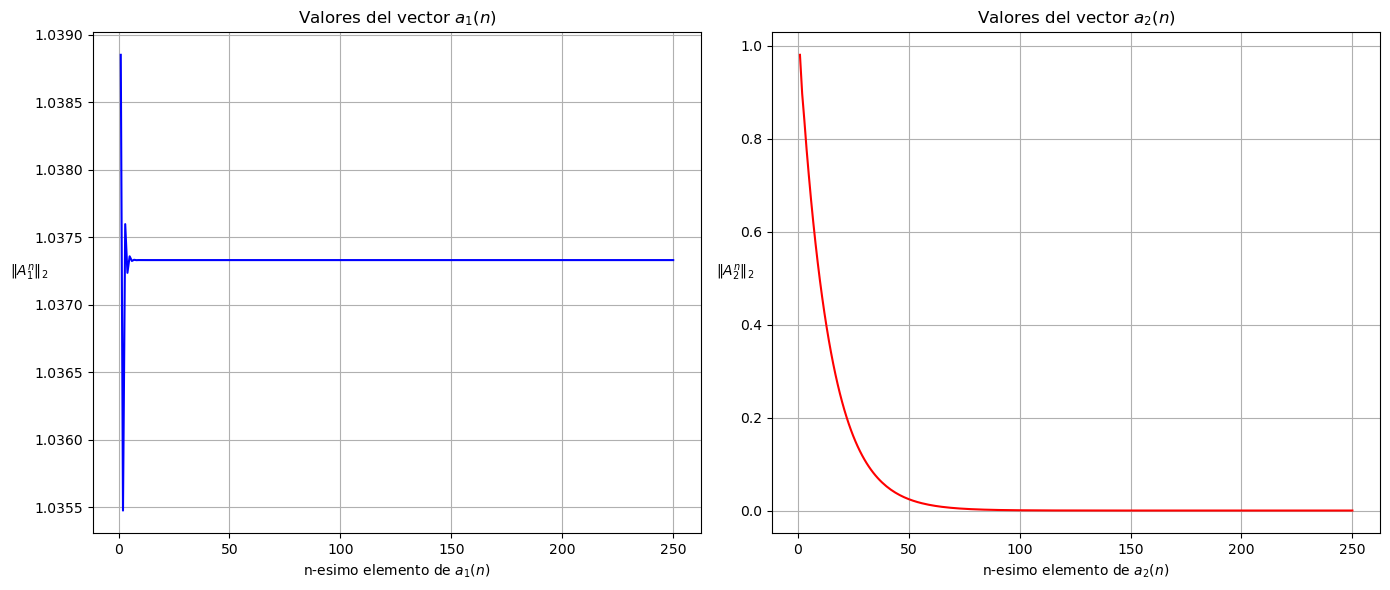

In [127]:
# Graficamos los resultados en dos figuras lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#a1(n)
ax1.plot(range(1, N+1), a1, color='blue')
ax1.set_title('Valores del vector $a_1(n)$')
ax1.set_xlabel('n-esimo elemento de $a_1(n)$')
ax1.set_ylabel('$\|A_1^n\|_2$', rotation=0)
ax1.grid(True)

#a2(n)
ax2.plot(range(1, N+1), a2, color='red')
ax2.set_title('Valores del vector $a_2(n)$')
ax2.set_xlabel('n-esimo elemento de $a_2(n)$')
ax2.set_ylabel('$\|A_2^n\|_2$', rotation=0)
ax2.grid(True)

plt.tight_layout()
plt.show()

### **Consigna 3**

En esta consigna nos piden encontrar, mediante el método de la potencia, el mayor autovalor de las matrices $A_1$ y $A_2$.

Nosotros sabemos que, dada una matriz $A \in \mathbb{R}^{nxn}$ diagonalizable (es decir, existe una base de autovectores) con la propiedad que tiene un solo valor propio de módulo máximo, entonces podemos ordenar sus autovalores de la siguiente manera:

$|\lambda_1| > |\lambda_2| \geq |\lambda_3| \geq ... \geq |\lambda_n|$

Y si consideramos un vector $v^{(0)} \in \mathbb{R}^n$, cualquiera no nulo, y calculamos distintos términos de la sucesión definida recursivamente por:

$v^{(k)} = \frac{A v^{(k-1)}}{||A v^{(k-1)}||_2}$, para $k \geq 1$

Entonces, el método de la potencia nos asegura que a medida que $k \rightarrow +\infty$, los vectores $v_k$ se van alineando con el autovector $w$ del autovalor $\lambda_1$.

A partir de esto, podemos obtener el valor de $\lambda_1$, mediante el cociente de Rayleigh:

$r(v) = \frac{v^T A v}{v^T v}$

Ahora bien, dado que el método de la potencia es inicializado con un vector aleatorio $v^{(0)}$, nos piden hacer el cálculo del autovalor estadísticamente con el método de Monte Carlo y se pide transcribir en una tabla el promedio de los autovalores de todas las iteraciones de Monte Carlo para cada matriz, poniendo además el desvío estandar encontrado.

In [128]:
# Creamos dos listas vacias donde vamos a guardar todos candidatos a mayor
# autovalor de las matrices A_1 y A_2:
autovaloresA_1 = []
autovaloresA_2 = []

# Realizamos el método de Monte Carlo unas 250 veces:
for i in range(250):
    autovalor_1 = metodoPotencia(A1, 1000)
    autovalor_2 = metodoPotencia(A2, 1000)
    
    autovaloresA_1.append(autovalor_1)
    autovaloresA_2.append(autovalor_2)

# Creamos la tabla:
tabla = pd.DataFrame()

# Definimos las matrices:
tabla["Matriz"] = ["Matriz 1", "Matriz 2"]

# Calculamos el promedio de los mayores autovalores calculados:
promedio_1 = np.mean(autovaloresA_1)
promedio_2 = np.mean(autovaloresA_2)

tabla["Promedio"] = [promedio_1, promedio_2]

# Calculamos el desvío estándar de los autovalores:
desvio_estandar_1 = np.std(autovaloresA_1)
desvio_estandar_2 = np.std(autovaloresA_2)

tabla["Desvío estandar"] = [desvio_estandar_1, desvio_estandar_2]

display(tabla)

,Matriz,Promedio,Desvío estandar
0,Matriz 1,1.000000,3.140185e-17
1,Matriz 2,0.927651,1.562222e-16


In [129]:
# Verificamos si los valores de los promedios obtenidos coinciden con los
# autovalores mayores:

autovalores_A1 = np.linalg.eig(A1)[0]
autovalores_A2 = np.linalg.eig(A2)[0]

print("Autovalor mayor de la matriz 1: ", autovalores_A1[0])
print("Autovalor mayor de la matriz 2: ", autovalores_A2[0])

Autovalor mayor de la matriz 1:  (1.0000000000000002+0j)
Autovalor mayor de la matriz 2:  (0.9276514472123603+0j)


Podemos observar que los valores de los autovalores de módulo mayor de cada matriz coinciden con los promedios obtenidos al realizar el Método de la Potencia 250 veces. Además, podemos observar que el desvío estandar obtenido para cada matriz es casi insignificante, lo cual nos da a entender que de las 250 veces que se repitio el experimento, los distintos valores diferian muy poco entre si. Esto nos indica que el Método de la Potencia es muy eficiente al momento de buscar el autovalor de mayor módulo de una matriz.

### **Consigna 4**


De forma similar a la consigna 2, tenemos que graficar la serie de potencias $(I − A)^{−1}$ de $A1$ y $A2$ (siguiendo la ecuación 4) para para $n = 10$ y $n = 100$

donde la ecuación 4 es 
$$
(I-A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots
$$


In [130]:
# Creamos los vectores correspondientes:
N = 100
a1 = np.zeros(N)
a2 = np.zeros(N)

A1_potencia = np.eye(A1.shape[0])  # Id del tam de A1
A2_potencia = np.eye(A2.shape[0])  # Id del tam de A2

suma_infinita_A1 = np.eye(A1.shape[0]) # Id del tam de A1
suma_infinita_A2 = np.eye(A2.shape[0]) # Id del tam de A2

for n in range(N):
    A1_potencia = A1_potencia @ A1  # Potencia de A1
    A2_potencia = A2_potencia @ A2  # Potencia de A2
    
    suma_infinita_A1 = suma_infinita_A1 + A1_potencia # Serie de potencias de A1
    suma_infinita_A2 = suma_infinita_A2 + A2_potencia # Serie de potencias de A2
    
    a1[n] = norm(suma_infinita_A1, 2) # Norma 2 de A1^n
    a2[n] = norm(suma_infinita_A2, 2) # Norma 2 de A2^n

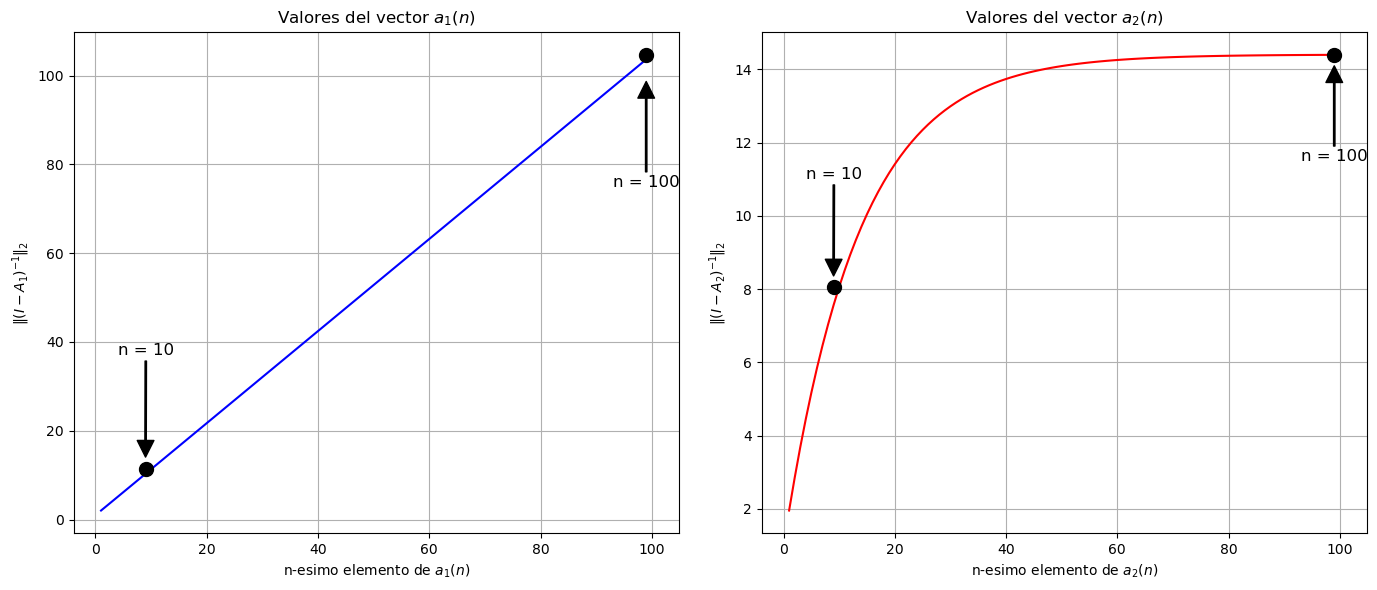

In [131]:
# Graficamos los resultados en dos figuras lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#a1(n)
ax1.plot(range(1, N+1), a1, color='blue')
ax1.set_title('Valores del vector $a_1(n)$')
ax1.set_xlabel('n-esimo elemento de $a_1(n)$')
ax1.set_ylabel('$\|(I - A_1)^{-1}\|_2$', rotation=90)
ax1.plot(9, a1[9], marker = 'o', color = 'black', markersize = 10, label = "n = 10")
ax1.plot(99, a1[99], marker = 'o', color = 'black', markersize = 10, label = "n = 100")
ax1.grid(True)
ax1.annotate('n = 10', xy = (9, a2[9] + 6), xytext = (4, 37), fontsize = 12, 
             arrowprops=dict(facecolor='black', width = 1))
ax1.annotate('n = 100', xy = (99, a1[99] - 6), xytext = (93, 75), fontsize = 12, 
             arrowprops=dict(facecolor='black', width = 1))

#a2(n)
ax2.plot(range(1, N+1), a2, color='red')
ax2.set_title('Valores del vector $a_2(n)$')
ax2.set_xlabel('n-esimo elemento de $a_2(n)$')
ax2.set_ylabel('$\|(I - A_2)^{-1}\|_2$', rotation=90)
ax2.plot(9, a2[9], marker = 'o', color = 'black', markersize = 10, label = "n = 10")
ax2.plot(99, a2[99], marker = 'o', color = 'black', markersize = 10, label = "n = 100")
ax2.grid(True)
ax2.annotate('n = 10', xy = (9, a2[9] + 0.3), xytext = (4, 11), fontsize = 12, 
             arrowprops=dict(facecolor='black', width = 1))
ax2.annotate('n = 100', xy = (99, a2[99] - 0.3), xytext = (93, 11.5), fontsize = 12, 
             arrowprops=dict(facecolor='black', width = 1))

plt.tight_layout()
plt.show()

Teniendo en cuenta lo que aprendimos y probamos en la consigna 1 de este TP, al mirar ambos gráficos, podemos decir que NO hay convergencia en ambas matrices. Para que la suma infinita tenga convergencia, la sucesión de sumas parciales tiene que tener un límite en el infinito positivo.

A simple vista podemos observar que la suma infinita de la matriz $A_2$ tiene un límite en el infinito positivo. Esto es así dado que se cumple que:

$$\lim_{n \to \infty} A^{n+1} = 0$$ 

como pudimos observar en el gráfico de la consigna 2.

Ahora bien, esto no ocurre en la suma infinita de la matriz $A_1$. El gráfico correspondiente a dicha matriz nos indica que la suma infinita de $A_1$ no posee límite en el infinito positivo. Si observamos el gráfico de la consigna 2 podemos observar que:

$$\lim_{n \to \infty} A^{n+1} \neq 0$$

Por lo tanto, podemos concluir que como regla para poder asegurar convergencia de la serie infinita se tiene que cumplir que las potencias sucesivas de la matriz se vuelvan pequeñas, es decir, que todas las entradas de la matriz se acerquen a cero.

Por último calculemos el error obtenido para cada matrices como un vector:

$$e(n) = \|(I + A + A^2 + A^3 + ... + A^n) - (I - A)^{-1}\|_2$$

y analicemos los resultados.

In [135]:
# Creamos los dos vectores de los errores:
N = 100
error_1 = np.zeros(N)
error_2 = np.zeros(N)

# Definimos las matrices identidad:
Id_1 = np.eye(A1.shape[0])  # Id del tam de A1
Id_2 = np.eye(A2.shape[0])  # Id del tam de A2

# Calculamos (I - A)^{-1}:
P1, L1, U1 = calcularLU(Id_1-A1)
P2, L2, U2 = calcularLU(Id_2-A2)

inv_1 = inversaLU(L1, U1, P1)
inv_2 = inversaLU(L2, U2, P2)

# Calculamos las sumas infinitas:
A1_potencia = np.eye(A1.shape[0])  # Id del tam de A1
A2_potencia = np.eye(A2.shape[0])  # Id del tam de A2

suma_infinita_A1 = np.eye(A1.shape[0]) # Id del tam de A1
suma_infinita_A2 = np.eye(A2.shape[0]) # Id del tam de A2

for n in range(N):
    A1_potencia = A1_potencia @ A1  # Potencia de A1
    A2_potencia = A2_potencia @ A2  # Potencia de A2
    
    suma_infinita_A1 = suma_infinita_A1 + A1_potencia # Serie de potencias de A1
    suma_infinita_A2 = suma_infinita_A2 + A2_potencia # Serie de potencias de A2

    error_1[n] = norm(suma_infinita_A1 - inv_1, 2)
    error_2[n] = norm(suma_infinita_A2 - inv_2, 2)

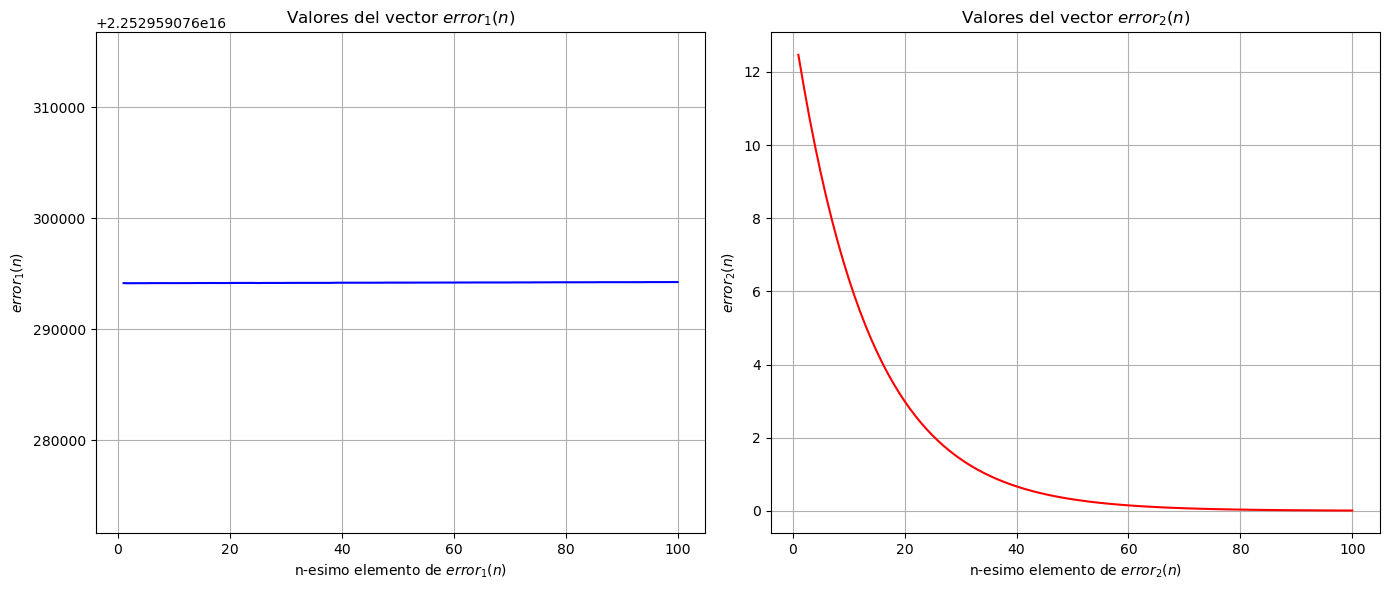

In [136]:
# Graficamos los distintos errores en dos figuras lado a lado:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#error_1(n)
ax1.plot(range(1, N+1), error_1, color='blue')
ax1.set_title('Valores del vector $error_1(n)$')
ax1.set_xlabel('n-esimo elemento de $error_1(n)$')
ax1.set_ylabel('$error_1(n)$', rotation=90)
ax1.grid(True)


#error_2(n)
ax2.plot(range(1, N+1), error_2, color='red')
ax2.set_title('Valores del vector $error_2(n)$')
ax2.set_xlabel('n-esimo elemento de $error_2(n)$')
ax2.set_ylabel('$error_2(n)$', rotation=90)
ax2.grid(True)


plt.tight_layout()
plt.show()

Podemos observar que lo que aprendimos en la consigna 1 se ve reflejado perfectamente en estos dos gráficos:

$$
(I - A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots \Longleftrightarrow \lim_{n \to \infty} A^{n+1} = 0
$$

Nosotros sabemos que la matriz $A_1$ ***NO*** cumple con $\lim_{n \to \infty} A^{n+1} = 0$ entonces era esperable que la igualdad $(I - A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots$ no se cumpla, dado que podemos observar que el error calculado en este caso da un valor enorme y constante para cualquier n. En cambio, con la matriz $A_2$ ocurre lo contrario, el error converge a 0 a medida que el valor de n crece.

### **Consigna 5**

Lo siguiente es lo que hicimos en el anterior trabajo para seleccionar los paises que nos fueron asignados

In [2]:
# Leemos el archivo completo.
MIP_Latinoamericana_2011 = pd.read_excel("MIP_Latinoamericana_2011.xlsx", engine = "openpyxl", sheet_name = None)

# Seleccionamos la hoja "LAT_IOT_2011".
LAT_IOT_2011 = MIP_Latinoamericana_2011["LAT_IOT_2011"]

# Seleccionamos las filas correspondientes.
M_insumo_producto = LAT_IOT_2011[(LAT_IOT_2011["Country_iso3"] == "BRA") | (LAT_IOT_2011["Country_iso3"] == "GTM")]

# Seleccionamos las columnas correspondientes y me guardo los datos de los outputs en una variable.
outputs = M_insumo_producto["Output"].to_numpy()
sectores_BRA = []
sectores_GTM = []

for sector in range(40):
    sector_bra = "BRAs" + str(sector + 1)
    sector_gtm = "GTMs" + str(sector + 1)

    sectores_BRA.append(sector_bra)
    sectores_GTM.append(sector_gtm)

M_insumo_producto = M_insumo_producto[sectores_BRA + sectores_GTM]

# Acomodamos los índices.
M_insumo_producto = M_insumo_producto.reset_index().drop(columns = ["index"])

In [3]:
vector_de_produccion = LAT_IOT_2011[(LAT_IOT_2011["Country_iso3"] == "BRA") | (LAT_IOT_2011["Country_iso3"] == "GTM")]["Output"].to_numpy()

p = vector_de_produccion

#reemplazamos los 0s por 1s en el vector de producción
p_mod = np.where(p == 0, 1, p)

#creamos la matriz diagonal P a partir del vector de producción modificado
matriz_P = np.diag(p_mod.flatten())

#calculamos la inversa de la matriz diagonal
P, L, U = calcularLU(matriz_P)

#calculamos A
A = M_insumo_producto.to_numpy() @ inversaLU(L, U, P)

In [4]:
A_rr = A[:40, :40]
A_rs = A[:40, 40:]
A_sr = A[40:, :40]
A_ss = A[40:,40:]

Ahora bien, la consigna nos pide que, mediante el método de la potencia, encontremos el autovalor mayor de cada una de las matrices $A^{ss}$ y $A^{rr}$. Y tambien nos piden que decidamos si existe convergencia de la suma de potencias, a partir del argumento dado en la consigna anterior.

Entonces, en primer lugar, vamor a calcular el autovalor mayor de cada uno de las matrices dadas.

In [113]:
autovalor_A_rr = metodoPotencia(A_rr, 1000)
autovalor_A_ss = metodoPotencia(A_ss, 1000)

print("El mayor autovalor de la matriz A_rr es ", autovalor_A_rr)
print("El mayor autovalor de la matriz A_ss es ", autovalor_A_ss)

El mayor autovalor de la matriz A_rr es  0.4462754938265393
El mayor autovalor de la matriz A_ss es  0.2735573746697762


In [114]:
# Verificamos si los valores de los mayores autovalores obtenidos coinciden:

autovalores_A_rr = np.linalg.eig(A_rr)[0]
autovalores_A_ss = np.linalg.eig(A_ss)[0]

print("Autovalor mayor de la matriz A_rr: ", autovalores_A_rr[0])
print("Autovalor mayor de la matriz A_ss: ", autovalores_A_ss[0])

Autovalor mayor de la matriz A_rr:  (0.4462754938265391+0j)
Autovalor mayor de la matriz A_ss:  (0.2735573746697759+0j)


Podemos observar que tanto la matriz $A_{rr}$ y la matriz $A_{ss}$ tienen un radio espectral menor a 1, es decir, $max(|\lambda_i|) < 1$. 

Como definimos en la consigna anterior, el hecho de que el autovalor de módulo mayor de una matriz sea menor a 1, nos garantiza que la suma de las potencias va a converger a cero.

Por lo tanto, podemos asegurar que existe convergencia de la suma de potencias para ambas matrices.

### **Consigna 6**

#### *Consigna a)*

Tenemos que:

$$
\begin{aligned}
E_n\;z &= \left(I_n - \frac{1}{n}ee^t\right)z \\
&= z - \frac{1}{n}ee^tz
\end{aligned}
$$

Notemos que $e^tz$ no es otra cosa que la suma de los elementos de $z$:

$$
e^tz = \sum_{i=1}^n z_i
$$

Veamos entonces de calcular el promedio de los componentes del vector $E_n z=v$:

$$
\begin{aligned}
\frac{1}{n} \sum_{i=1}^n v_i &= \frac{1}{n} \sum_{i=1}^n \left(z_i-\frac{1}{n}e_{i} \sum_{j=1}^n z_j\right) \\
&= \frac{1}{n} \sum_{i=1}^n z_i - \frac{1}{n} \sum_{i=1}^n \frac{1}{n}e_{i} \sum_{j=1}^n z_j
\end{aligned}
$$

Como $\sum_{i=1}^n \frac{1}{n} e_{i} = 1$, nos queda que:

$$
\begin{aligned}
\frac{1}{n} \sum_{i=1}^n v_i &= \frac{1}{n} \sum_{i=1}^n z_i - \frac{1}{n} \sum_{j=1}^n z_j \\
&= 0
\end{aligned}
$$

... tal como queriamos probar.

Ahora bien, si tenemos una matriz $A$ de $n\times n$ tenemos que $E_nA$ no es mas que aplicar $E_n$ en cada columna de $A$ de manera que $E_n a_j$ sera la version centrada de la columna $a_j$. Es decir, $E_n a_j$ tiene un promedio en sus componentes igual a $0$. En consecuencia, $E_n$ nos permite "centrar" la matriz $A$.

#### *Consigna b)*

Teniendo en cuenta la sugerencia dada en el enunciado, veamos primero lo que sucede con el vector $e$ cuando le aplicamos $E_n$:

$$
\begin{aligned}
E_n e &= \left(I_n - \frac{1}{n}ee^t\right)e \\
&= e - \frac{1}{n}e(e^te) \\
&= e - \frac{1}{n}e\;n\\
&= e - e \\
&= 0
\end{aligned}
$$

Esto nos dice que $e$ convive en el nucleo de $E_n$ y su autovalor asociado es $0$.

Siendo $\{d_1,...,d_n\}$ una base de $\langle\mathbf{e}\rangle^{\perp}$, vemos que para cualquier vector $d$ ortogonal a $e$ (ie.: $e^t d=0$) nos da lo siguiente:

$$
\begin{aligned}
E_n e &= \left(I_n - \frac{1}{n}ee^t\right)d \\
&= d - \frac{1}{n}e(e^td) \\
&= d - \frac{1}{n}e\;0\\
&= d - 0 \\
&= d
\end{aligned}
$$

Es decir, $E_n d = d$ nos indica que cualquiera de estos vectores $d$ tendran un autovalor asociado igual a $1$. 

Ademas, con todo esto podemos ver que el nucleo de $E_n$ es generado por $e$, siendo entonces la dimension del mismo igual a $1$. Por otro lado, tenemos que la imagen de $E_n$ esta dada por todo el subespacio ortogonal a $e$. Dicha imagen tiene dimension igual a $n-1$, pues estamos en $\mathbb{R}^n$ y restamos la direccion correspondiente al vector $e$. 


#### *Consigna c)*

Sabemos que una transformacion lineal $P:\mathbb{V}\rightarrow\mathbb{V}$ se dice proyector si:

$$
P^2=P
$$

Veamoslo para $E_n$:

$$
\begin{aligned}
E_n^2 &= \left(I_n-\frac{1}{n}ee^t\right)\left(I_n-\frac{1}{n}ee^t\right) \\
&= I_n - \frac{1}{n}ee^t-\frac{1}{n}ee^t+\frac{1}{n^2}ee^tee^t \\
&= I_n - \frac{1}{n}ee^t-\frac{1}{n}ee^t+\frac{1}{n}ee^t \\
&= I_n - \frac{1}{n}ee^t \\
&= E_n
\end{aligned}
$$

... como queriamos probar.

Tambien sabemos que una proyeccion es ortogonal si y solo si es una matriz simetrica, es decir:

$$
P=P^t
$$

Veamos:

$$
\begin{aligned}
E_n^t &= \left(I_n-\frac{1}{n}ee^t\right)^t \\
&= I_n^t - \left(\frac{1}{n}ee^t\right)^t \\
&= I_n - \frac{1}{n}ee^t \\
&= E_n
\end{aligned}
$$

De esta manera concluimos que $E_n$ es una matriz de proyeccion ortogonal. 

Como vimos en el item anterior, la matriz $E_n$ proyecta cualquier vector en el subespacio ortogonal al vector $e$. Es decir, el conjunto de todos los vectores $v$ en $\mathbb{R}^n$ que cumplen:

$$
e^tv=0
$$

#### *Consigna d)*

1. $E_n$ es una matriz ortogonal

    Para esto, deberia darse que:

$$
E_n^{-1}=E_n^t
$$

Si bien $E_n$ es una matriz de proyeccion ortogonal, esta no necesariamente es una matriz ortogonal en el sentido $E_n^tE_n=I$. Si $E_n$ fuese ortogonal, entonces tambien tendria que ser inversible, pero al tener un autovalor $0$ esto no se cumple. Por tanto, no es ortogonal.    

2. $E_n$ es singular

    Una matriz es singular si y solo si su determinante es nulo, o lo que es lo mismo, que alguno de sus autovalores sea igual a $0$. Esto ya vimos que es asi en el item b, por lo que $E_n$ es singular. 

3. $E_n$ es definida positiva

Sabemos que una matriz $A$ es definida positiva si y solo si, para todo vector $x\neq 0$, se cumple que:

$$
xAx^t>0
$$

... siendo todos sus autovalores positivos. 

Veamos como esto no se cumple con el vector $e$ visto antes:

$$
\begin{aligned}
e^tE_n e &= e^t\left(I_n-\frac{1}{n}ee^t\right)e \\
&= e^te-\frac{1}{n}e^tee^te
\end{aligned}
$$

Como tenemos que $e^te=1+1+...+1=n$, nos queda:

$$
\begin{aligned}
e^tE_n e &= n-\frac{1}{n} n n \\
&= n-n \\
&= 0
\end{aligned}
$$

Por lo que concluimos que $E_n$ no es definida positiva. 

4. $\text{traza}(E_n)=n-1$

La traza de una matriz es igual a la suma de sus autovalores. Como vimos en el item b, sus autovalores son: $\lambda = 0$ (de multplicidad $1$) y $\lambda = 1$ (de multplicidad $n-1$). Entonces:

$$
\text{traza}(E_n) = 0+(n-1)\cdot 1 = n-1
$$

### **Consigna 7**

#### Con lo que hicimos en la consigna 5, procedemos a normalizar la matriz de coeficientes $A_{rr}$

In [5]:
n = A_rr.shape[0]
e = np.ones((n, 1))
E = np.eye(n) - (1/n) * e @ e.T
A_rr_normalizada = E @ A_rr

Ahora calculamos la matriz de covarianzas $C$:

In [6]:
n = A_rr_normalizada.shape[0]
C = (A_rr_normalizada.T @ A_rr_normalizada) / (n - 1)

Veamos entonces de calcular los 2 primeros autovectores usando el metodo de la potencia indicado en la consigna( Algoritmo Deflacion de Hotelling):

In [8]:
#tomamos los siguientes parametros
epsilon = 1e-6
k = 250

#calculamos
v1, autovalor1 = deflacion_de_Hotelling(C,k,epsilon)

Bien, ahora veamos de eliminar la influencia del primer vector dominante por el metodo de deflacion y asi conseguir el segundo autovector y autovalor asociado de la matriz:

In [10]:
#"deflacionamos" la matriz de covarianzas
C_prima = C - autovalor1 * np.outer(v1, v1)

#calculamos
v2, autovalor2 = deflacion_de_Hotelling(C_prima,k,epsilon)

#### Hagamos visualizaciones para verificar

Autovalor dominante de C: 0.018112589380360606
Autovector asociado al autovalor dominante de C: [-0.06141839 -0.06141839 -0.02144632 -0.02470802 -0.47828668 -0.21418887
 -0.53248039 -0.43181064 -0.07301657 -0.39416629 -0.09760824 -0.02337641
 -0.02097937 -0.16914861 -0.07922224  0.0270328  -0.11705595 -0.04351269
 -0.05747598 -0.04395718 -0.03068903 -0.04690812 -0.03461575 -0.01672159
 -0.02751215 -0.03394334 -0.02964406 -0.03424867 -0.02614752 -0.01738522
 -0.01456373 -0.01652744 -0.02506646 -0.00592379 -0.00377194 -0.04407543
 -0.05117767 -0.03902787 -0.03023597 -0.03692741]


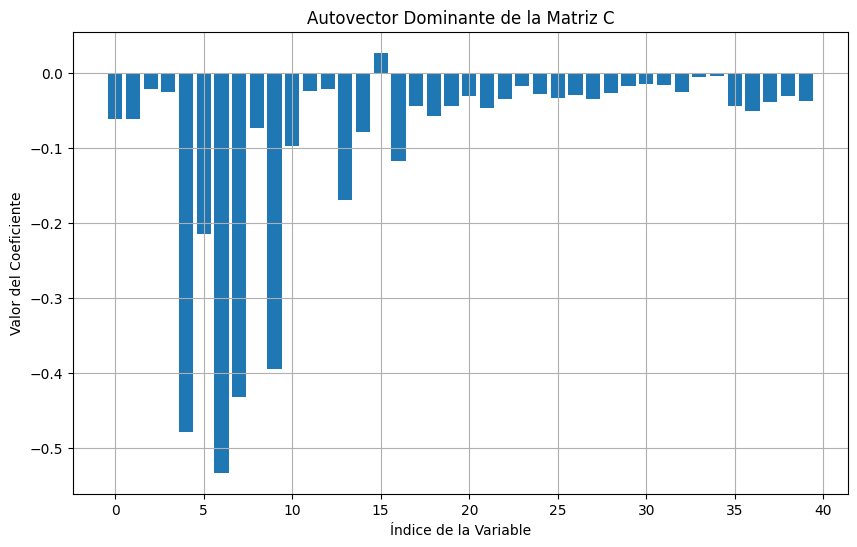



Autovalor dominante de C_prima: 0.007717926501717334
Autovector asociado al autovalor dominante de C_prima: [ 0.04026901  0.04026901  0.10651454  0.12010907 -0.1501355   0.08655857
 -0.20576012 -0.05113469  0.18067933 -0.06114825  0.07912071  0.1006402
  0.11375006  0.04347217  0.19665633  0.03949708  0.11085386  0.21898792
  0.2559059   0.17327169  0.18762192  0.24976135  0.24198144  0.16678885
  0.1892816   0.16889098  0.20333341  0.17041021  0.13010154  0.16896154
  0.11960069  0.13572709  0.14098104  0.11332071  0.08170049  0.1894858
  0.27802229  0.19266957  0.16034747  0.1417419 ]


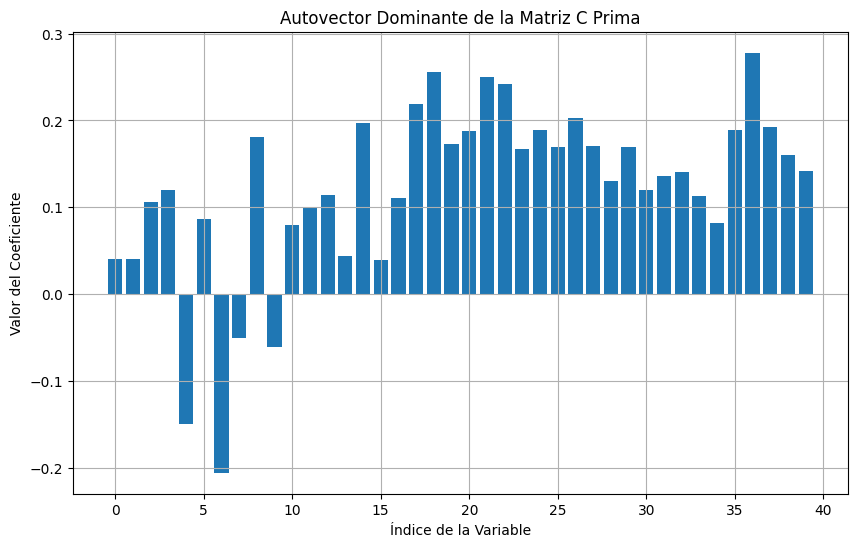

In [34]:
autovalores, autovectores = npla.eig(C)

indice_dominante = np.argmax(np.abs(autovalores))

autovalor_dominante = autovalores[indice_dominante]
print('Autovalor dominante de C:', autovalor_dominante)
autovector_dominante = autovectores[:, indice_dominante]
print('Autovector asociado al autovalor dominante de C:', autovector_dominante)
plt.figure(figsize=(10, 6))
plt.bar(range(len(autovector_dominante)), autovector_dominante)
plt.title('Autovector Dominante de la Matriz C')
plt.xlabel('Índice de la Variable')
plt.ylabel('Valor del Coeficiente')
plt.grid(True)
plt.show()
print("\n")
autovalores, autovectores = npla.eig(C_prima)

indice_dominante = np.argmax(np.abs(autovalores))

autovalor_dominante = autovalores[indice_dominante]
print('Autovalor dominante de C_prima:', autovalor_dominante)
autovector_dominante = autovectores[:, indice_dominante]
print('Autovector asociado al autovalor dominante de C_prima:', autovector_dominante)
plt.figure(figsize=(10, 6))
plt.bar(range(len(autovector_dominante)), autovector_dominante)
plt.title('Autovector Dominante de la Matriz C Prima')
plt.xlabel('Índice de la Variable')
plt.ylabel('Valor del Coeficiente')
plt.grid(True)
plt.show()

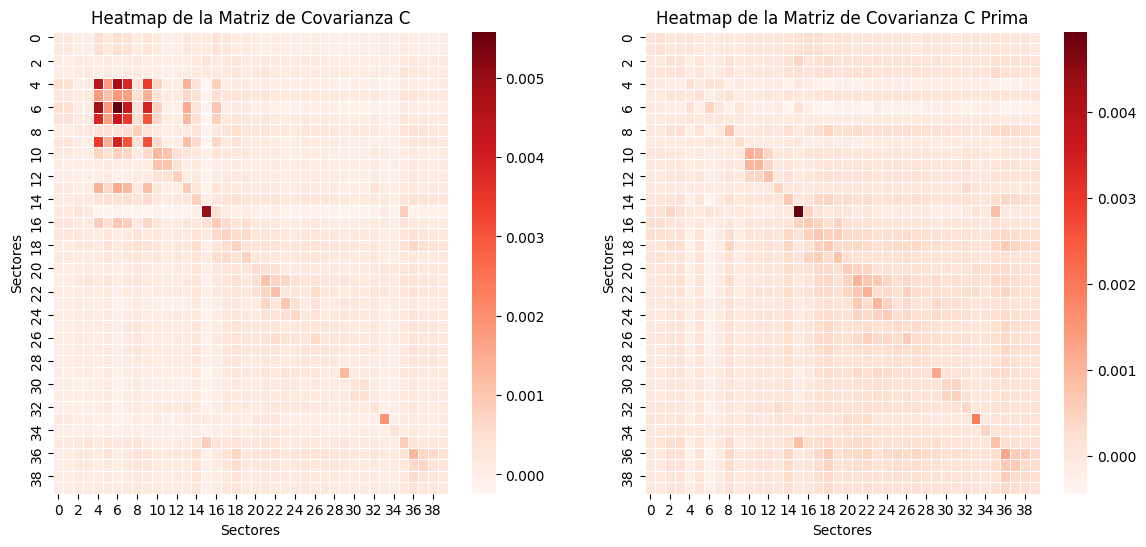

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(C, annot=False, cmap='Reds', linewidths=.5)
plt.title("Heatmap de la Matriz de Covarianza C")
plt.xlabel('Sectores')
plt.ylabel('Sectores')

plt.subplot(1, 2, 2)
sns.heatmap(C_prima, annot=False, cmap='Reds', linewidths=.5)
plt.title("Heatmap de la Matriz de Covarianza C Prima")
plt.xlabel('Sectores')
plt.ylabel('Sectores')
plt.show()

#### Análisis de los Heatmaps:

1. **Matriz de Covarianza `C` (izquierda)**:
   - Se observan **bloques oscuros** en la esquina superior izquierda, lo que indica que hay **correlaciones** entre ciertos grupos de sectores.
   - Estas correlaciones pueden representar **sectores que están muy interrelacionados**.

2. **Matriz de Covarianza `C_prima` (derecha)**:
   - Después de la **deflación**, la matriz muestra una disminución general en las correlaciones, ya que el primer autovector ha capturado la mayor parte de la variabilidad.
   - Algunos sectores aún muestran correlaciones significativas, lo que indica que el **segundo componente** está capturando **otras relaciones relevantes** no explicadas por el primer componente.

### **Consigna 8**

#### Pais 1: Brasil

Primero creamos la matriz de proyeccion $V$:

In [35]:
V = np.column_stack((v1, v2)) 

Ahora proyectamos las filas de $A_{rr}$ en el espacio de los dos autovectores dados:

In [36]:
A_rr_projectada = A_rr @ V

Veamoslo graficamente e indentifiquemos los clusters:

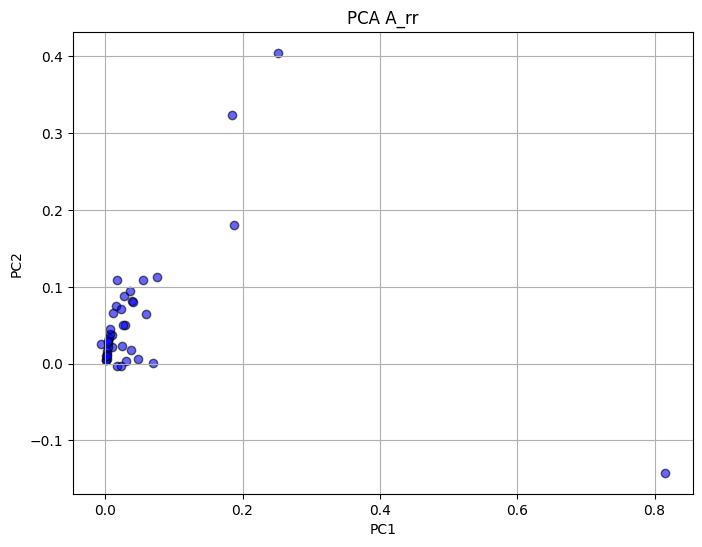

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(A_rr_projectada[:, 0], A_rr_projectada[:, 1], color='blue', alpha=0.6, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA A_rr")
plt.grid(True)
plt.show()

Usemos k-means para identificar los clusters. Primero veamos de encontrar el "punto codo" (o elbow point) para encontrar una cantidad "optima" de clusters:

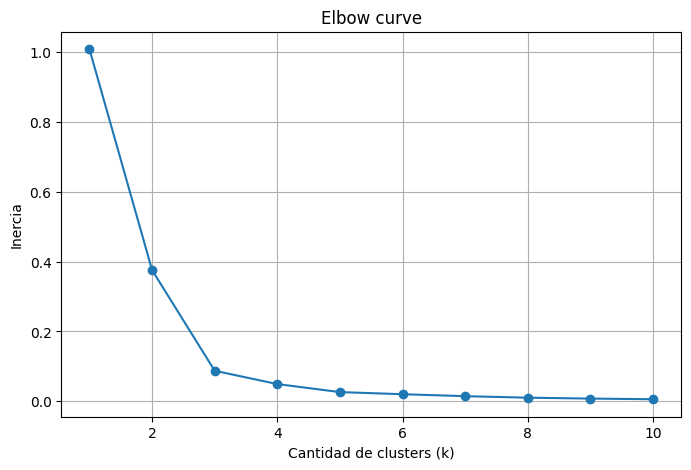

In [116]:
from sklearn.cluster import KMeans
inercia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(A_rr_projectada)
    inercia.append(kmeans.inertia_)

#grafiquemos
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, marker='o')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow curve')
plt.grid(True)
plt.show()

Tomemos $k=3$:

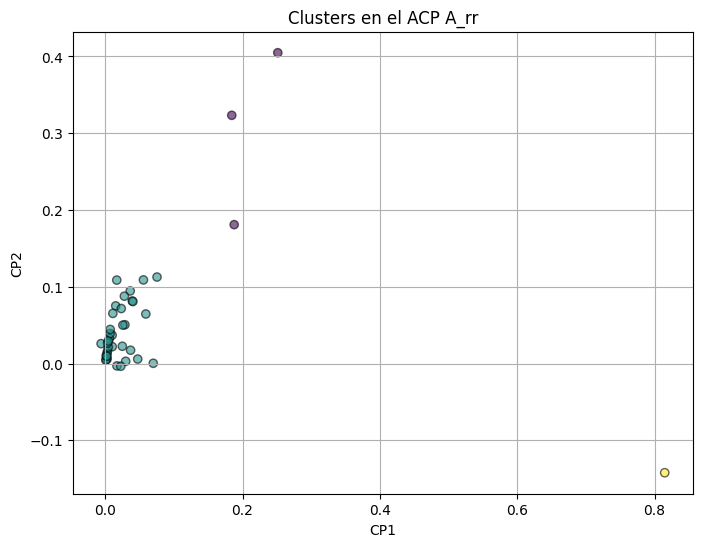

In [121]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(A_rr_projectada) #ajusta k-means en las proyecciones de la matriz

etiquetas = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(A_rr_projectada[:, 0], A_rr_projectada[:, 1], c=etiquetas, cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.title("Clusters en el ACP A_rr")
plt.grid(True)
plt.show()

#### Pais 2: Guatemala

In [72]:
n = A_ss.shape[0]
e = np.ones((n, 1))
E = np.eye(n) - (1/n) * e @ e.T
A_ss_normalizada = E @ A_ss

n = A_ss_normalizada.shape[0]
C = (A_ss_normalizada.T @ A_ss_normalizada) / (n - 1)

#tomamos los siguientes parametros
epsilon = 1e-6
k = 250

#calculamos
v1, autovalor1 = deflacion_de_Hotelling(C,k,epsilon)

#"deflacionamos" la matriz de covarianzas
C_prima = C - autovalor1 * np.outer(v1, v1)

#calculamos
v2, autovalor2 = deflacion_de_Hotelling(C_prima,k,epsilon)

In [73]:
V = np.column_stack((v1, v2)) 

A_ss_projectada = A_ss @ V

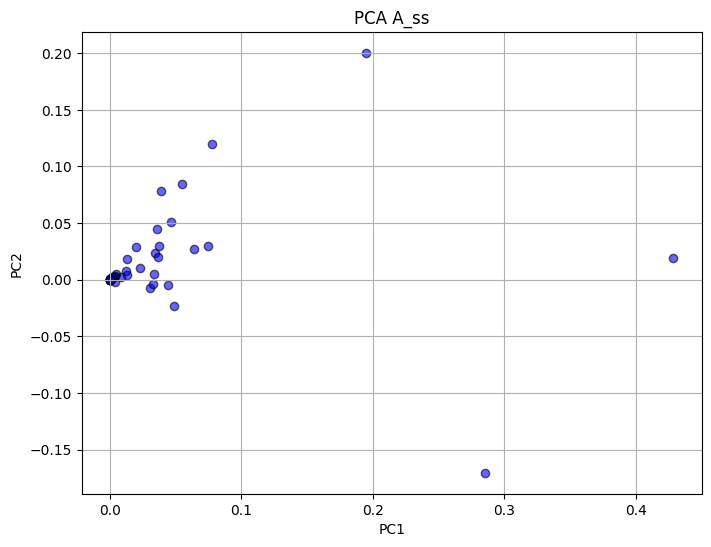

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(A_ss_projectada[:, 0], A_ss_projectada[:, 1], color='blue', alpha=0.6, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA A_ss")
plt.grid(True)
plt.show()

Igual que antes, aplicamos k-means:

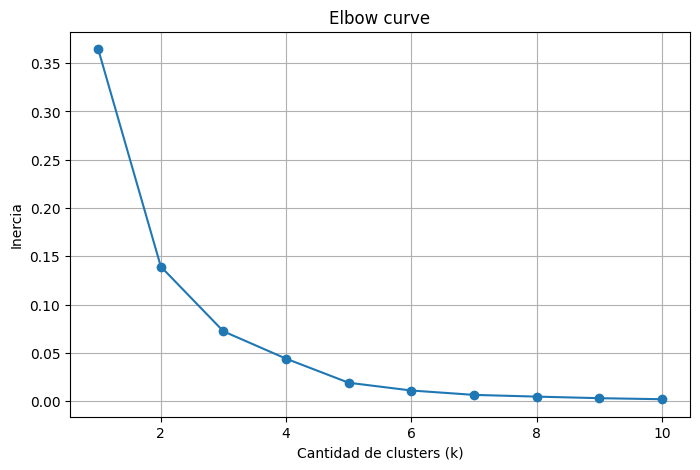

In [122]:
inercia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(A_ss_projectada)
    inercia.append(kmeans.inertia_)

#grafiquemos
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, marker='o')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow curve')
plt.grid(True)
plt.show()

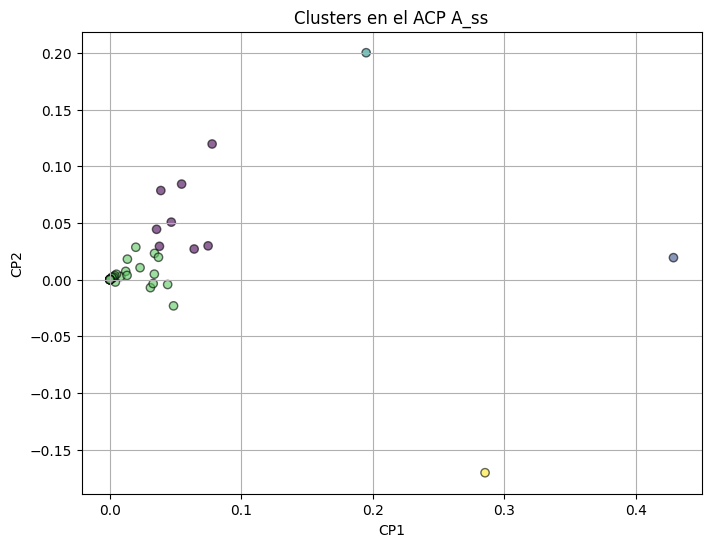

In [127]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(A_ss_projectada) #ajusta k-means en las proyecciones de la matriz

etiquetas = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(A_ss_projectada[:, 0], A_ss_projectada[:, 1], c=etiquetas, cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.title("Clusters en el ACP A_ss")
plt.grid(True)
plt.show()

### **Consigna 9**

####  Definición de $ \mathbf{H} $

La matriz $ \mathbf{H} $ se construye utilizando la matriz $ \mathbf{A} $ y el inverso de $ \mathbf{I} - \mathbf{A} $:
$$
\mathbf{H} = \mathbf{A} (\mathbf{I} - \mathbf{A})^{-1}
$$
Donde:
- $ \mathbf{A} $ representa la matriz de coeficientes técnicos de insumo-producto, donde cada elemento $a_{ij} $ indica la cantidad del producto $ j $ que se necesita para producir una unidad del producto $ i $.
- $ (\mathbf{I} - \mathbf{A})^{-1} $ por el trabajo anterior, sabemos que es la **matriz de Leontief**, que representa los efectos de interdependencia entre sectores cuando hay un cambio en la demanda final.

#### Relacionemos $ \mathbf{H} $ con la Suma de Potencias de $ \mathbf{A} $

La matriz de Leontief $ (\mathbf{I} - \mathbf{A})^{-1} $ se puede expandir en una serie de potencias de $ \mathbf{A} $ como vimos en el ejercicio 1:
$$
(\mathbf{I} - \mathbf{A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \dots + \mathbf{A}^n + \dots
$$
Entonces, podemos expresar $ \mathbf{H} $ como:
$$
\mathbf{H} = \mathbf{A} (\mathbf{I} + \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \dots + \mathbf{A}^n + \dots)
$$
Al expandir esta expresión, obtenemos:
$$
\mathbf{H} = \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \dots + \mathbf{A}^n + \dots
$$
Esto muestra que $ \mathbf{H} $ es, en esencia, la **suma de las potencias de la matriz $ \mathbf{A} $ comenzando desde la primera potencia**. En términos económicos, esto implica que $ \mathbf{H} $ refleja tanto los efectos directos como todos los efectos indirectos acumulados de las interacciones entre los sectores.

### **Consigna 10**

Apliquemos nuevamente el analisis ACP sobre la matriz $H$. Tomando la matriz $A^{rr}$ tenemos que:

$$
H^{rr}=A^{rr}(I-A^{rr})^{-1}
$$

Calculemos $(I-A^{rr})^{-1}$:

In [39]:
I = np.eye(A_rr.shape[0])
P, L, U = calcularLU(I-A_rr)
H_rr = A_rr @ inversaLU(L, U, P)

Hagamos lo mismo con $A^{ss}$:

In [43]:
P, L, U = calcularLU(I-A_ss)
H_ss = A_ss @ inversaLU(L, U, P)

Normalizamos:

In [46]:
n = H_rr.shape[0]
e = np.ones((n, 1))
E = np.eye(n) - (1/n) * e @ e.T
H_rr_normalizada = E @ H_rr

n = H_ss.shape[0]
e = np.ones((n, 1))
E = np.eye(n) - (1/n) * e @ e.T
H_ss_normalizada = E @ H_ss

Calculamos la matriz de covarianzas:

In [52]:
n = H_rr_normalizada.shape[0]
C_rr = (H_rr_normalizada.T @ H_rr_normalizada) / (n - 1)

n = H_ss_normalizada.shape[0]
C_ss = (H_ss_normalizada.T @ H_ss_normalizada) / (n - 1)

Veamos entonces de calcular los 2 primeros autovectores usando el metodo de la potencia de la consigna 7:

In [53]:
#tomamos los siguientes parametros
epsilon = 1e-6
k = 250

#calculamos
v1_rr, autovalor1_rr = deflacion_de_Hotelling(C_rr,k,epsilon)
v1_ss, autovalor1_ss = deflacion_de_Hotelling(C_ss,k,epsilon)


Ahora eliminemos la influencia del primer autovector dominante por el metodo de deflacion y asi conseguir el segundo autovector y autovalor asociado de la matriz:

In [ ]:
#"deflacionamos" las matrices de covarianzas
C_rr_prima = C_rr - autovalor1_rr * np.outer(v1_rr, v1_rr)
C_ss_prima = C_ss - autovalor1_ss * np.outer(v1_ss, v1_ss)

#calculamos
v2_rr, autovalor2_rr = deflacion_de_Hotelling(C_rr_prima,k,epsilon)
v2_ss, autovalor2_ss = deflacion_de_Hotelling(C_ss_prima,k,epsilon)

Creamos la matriz de proyeccion:

In [98]:
V_rr = np.column_stack((v1_rr, v2_rr))
V_ss = np.column_stack((v1_ss, v2_ss))

Ahora proyectamos las filas de $H^{rr}$ y $H^{ss}$ en el espacio de los dos autovectores dados:

In [99]:
H_rr_projectada = H_rr @ V_rr
H_ss_projectada = H_ss @ V_ss

Hagamos una visualizacion

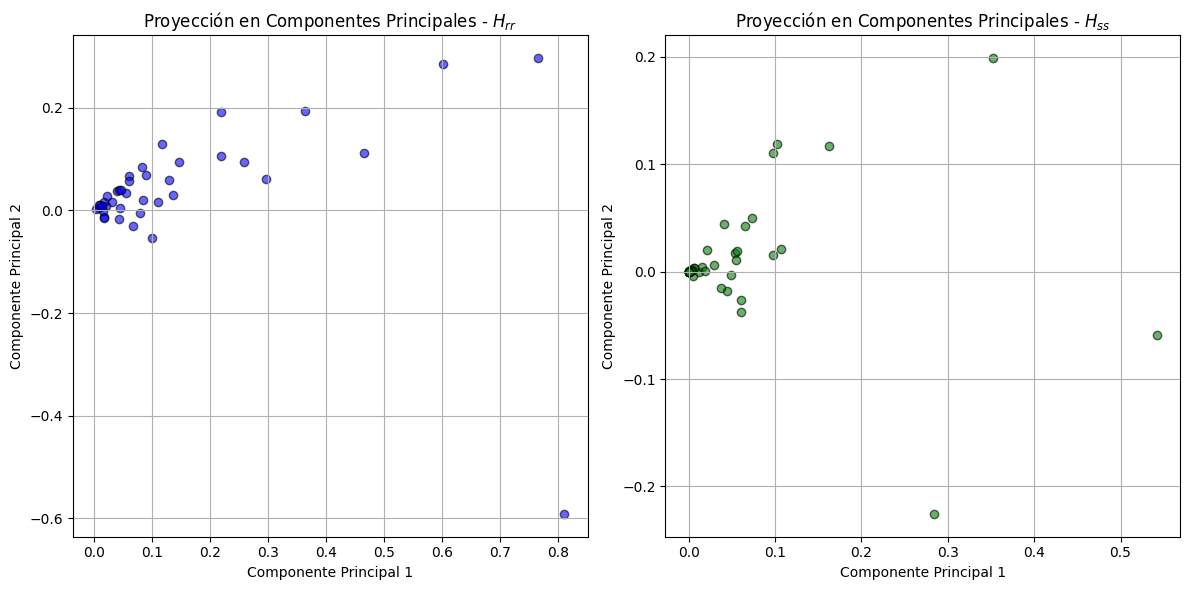

In [100]:
# Visualización para H_rr_projectada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(H_rr_projectada[:, 0], H_rr_projectada[:, 1], c='blue', alpha=0.6, edgecolor='k')
plt.title("Proyección en Componentes Principales - $H_{rr}$")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# Visualización para H_ss_projectada
plt.subplot(1, 2, 2)
plt.scatter(H_ss_projectada[:, 0], H_ss_projectada[:, 1], c='green', alpha=0.6, edgecolor='k')
plt.title("Proyección en Componentes Principales - $H_{ss}$")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

plt.tight_layout()
plt.show()

Usemos k-means:

##### Para $H_{rr}$

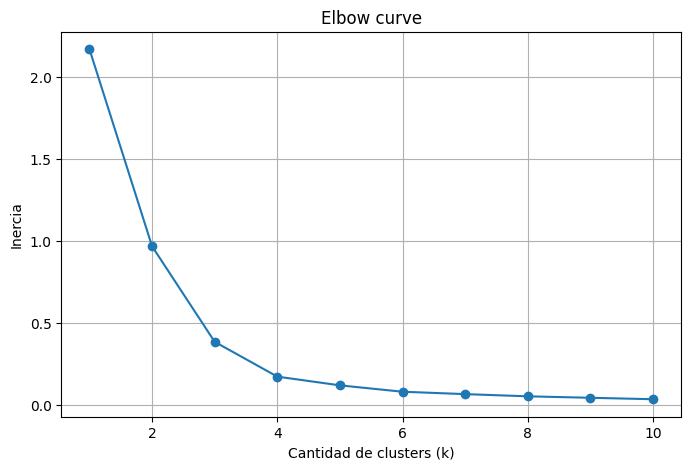

In [128]:
inercia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(H_rr_projectada)
    inercia.append(kmeans.inertia_)

#grafiquemos
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, marker='o')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow curve')
plt.grid(True)
plt.show()

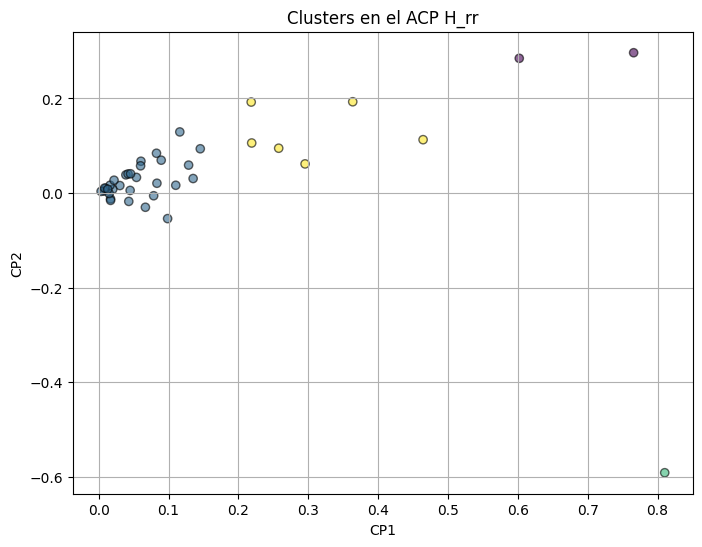

In [130]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(H_rr_projectada) #ajusta k-means en las proyecciones de la matriz

etiquetas = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(H_rr_projectada[:, 0], H_rr_projectada[:, 1], c=etiquetas, cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.title("Clusters en el ACP H_rr")
plt.grid(True)
plt.show()

#### Para $H_{ss}$

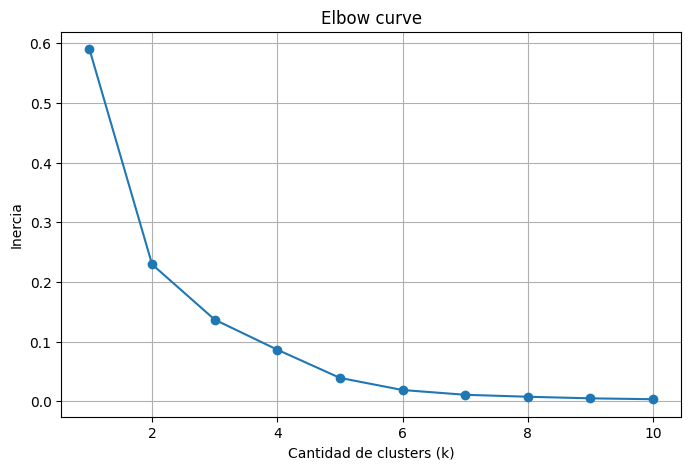

In [131]:
inercia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(H_ss_projectada)
    inercia.append(kmeans.inertia_)

#grafiquemos
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, marker='o')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow curve')
plt.grid(True)
plt.show()

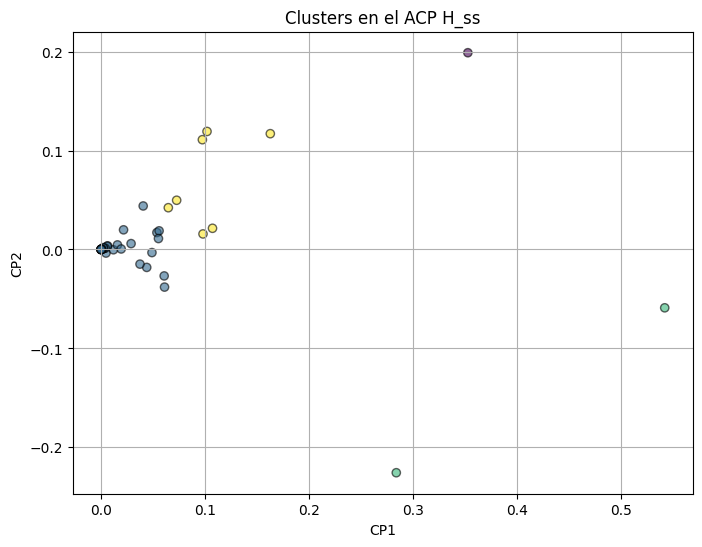

In [133]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(H_ss_projectada) #ajusta k-means en las proyecciones de la matriz

etiquetas = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(H_ss_projectada[:, 0], H_ss_projectada[:, 1], c=etiquetas, cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.title("Clusters en el ACP H_ss")
plt.grid(True)
plt.show()

### **Consigna 11**

Brasil:
Sector más cercano al origen: Medical, precision and optical instruments, 
Distancia: 0.004623318518783345
Sector más lejano al origen: Agriculture and forestry, 
Distancia: 0.8271398673035038

Guatemala:
Sector más cercano al origen: Non-ferrous metals, 
Distancia: 0.0
Sector más lejano al origen: Other services, 
Distancia: 0.42889560380892294


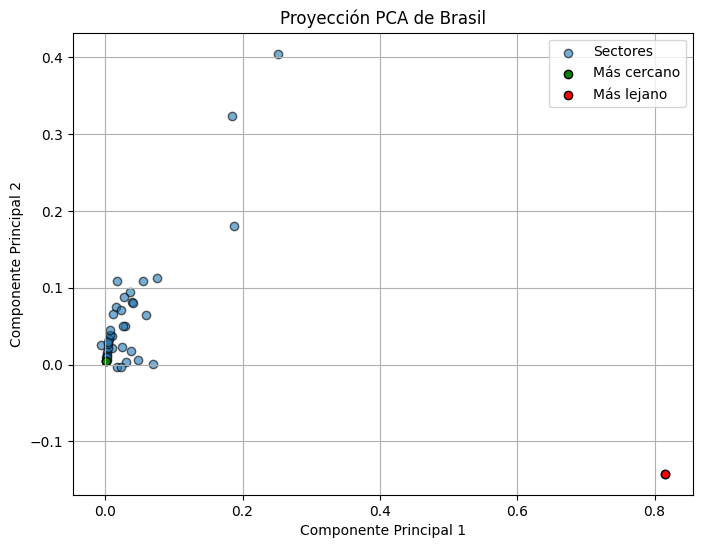

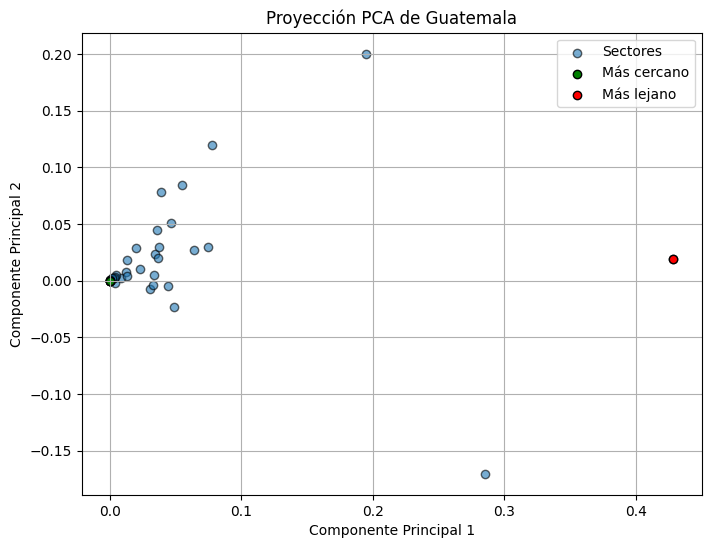

In [115]:
sectores = LAT_IOT_2011.Sector[:40]

#distancias al origen para A_rr_projectada
distancias_rr = np.linalg.norm(A_rr_projectada, axis=1)

indice_mas_cercano_rr = np.argmin(distancias_rr)
indice_mas_lejano_rr = np.argmax(distancias_rr)

print("Brasil:")
print(f"Sector más cercano al origen: {sectores[indice_mas_cercano_rr]}, \nDistancia: {distancias_rr[indice_mas_cercano_rr]}")
print(f"Sector más lejano al origen: {sectores[indice_mas_lejano_rr]}, \nDistancia: {distancias_rr[indice_mas_lejano_rr]}")

# Paso 2: Calcular las distancias al origen para A_ss_projectada (Guatemala)
distancias_ss = np.linalg.norm(A_ss_projectada, axis=1)

# Encontrar el sector más cercano y más lejano al origen
indice_mas_cercano_ss = np.argmin(distancias_ss)
indice_mas_lejano_ss = np.argmax(distancias_ss)

print("\nGuatemala:")
print(f"Sector más cercano al origen: {sectores[indice_mas_cercano_ss]}, \nDistancia: {distancias_ss[indice_mas_cercano_ss]}")
print(f"Sector más lejano al origen: {sectores[indice_mas_lejano_ss]}, \nDistancia: {distancias_ss[indice_mas_lejano_ss]}")

# funcion para la proyeccion
def plot_pca_projection(projection, distancias, indice_cercano, indice_lejano, pais):
    plt.figure(figsize=(8, 6))
    plt.scatter(projection[:, 0], projection[:, 1], alpha=0.6, edgecolor='k', label='Sectores')
    plt.scatter(projection[indice_cercano, 0], projection[indice_cercano, 1], color='green', edgecolor='k', label='Más cercano')
    plt.scatter(projection[indice_lejano, 0], projection[indice_lejano, 1], color='red', edgecolor='k', label='Más lejano')
    plt.title(f"Proyección PCA de {pais}")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend()
    plt.grid(True)
    plt.show()

#para Brasil
plot_pca_projection(A_rr_projectada, distancias_rr, indice_mas_cercano_rr, indice_mas_lejano_rr, "Brasil")

#para Guatemala
plot_pca_projection(A_ss_projectada, distancias_ss, indice_mas_cercano_ss, indice_mas_lejano_ss, "Guatemala")


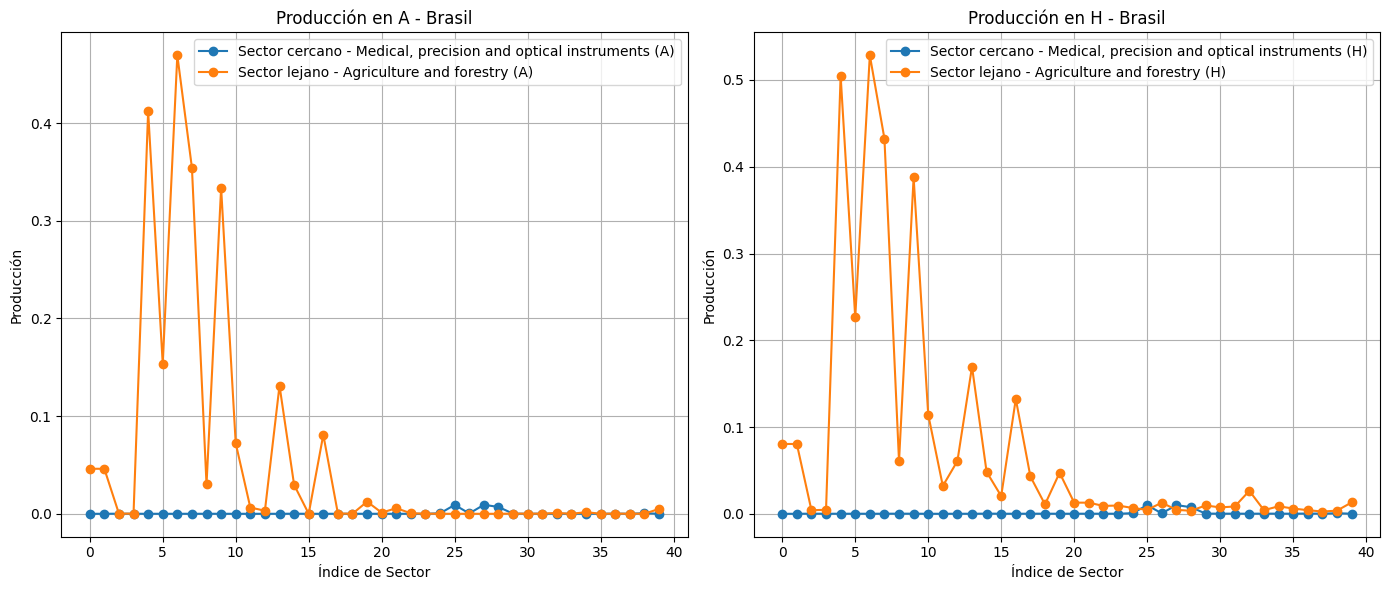

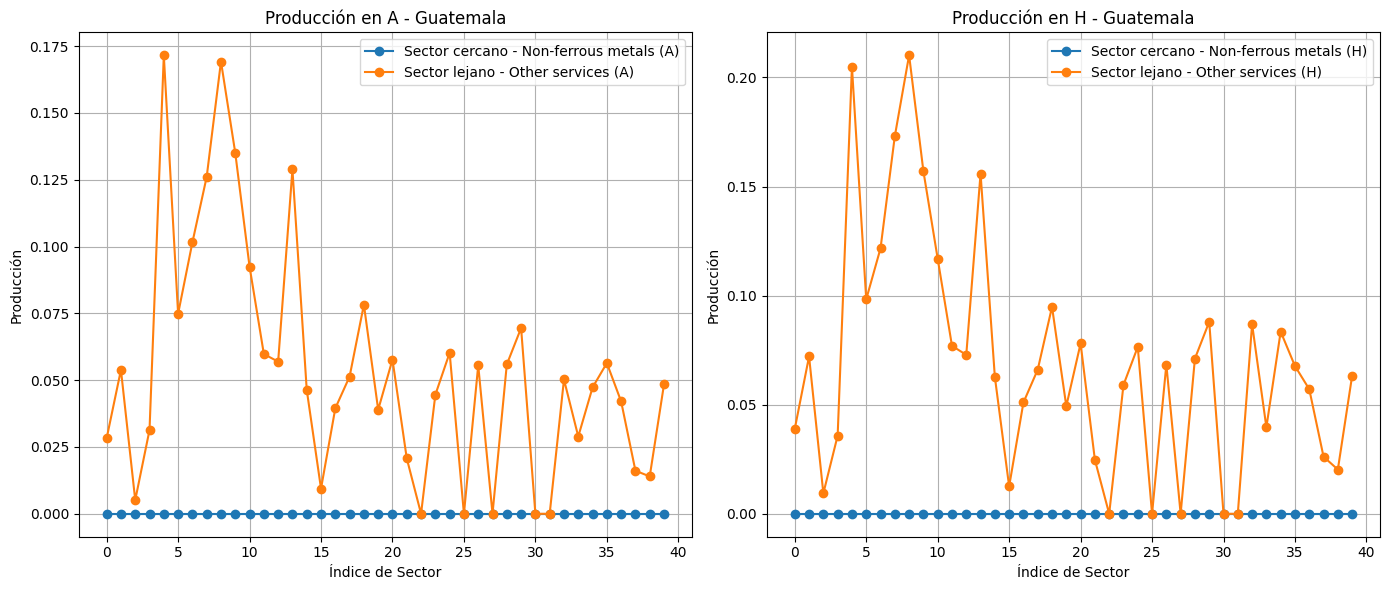

In [ ]:
# funcion para graficar mejor
def plot_pca_projection_indices(fila_cercano_A, fila_lejano_A, fila_cercano_H, fila_lejano_H, indice_cercano, indice_lejano, pais):
    indices = np.arange(len(fila_cercano_A))  # Generar índices 0, 1, 2, ..., 39
    plt.figure(figsize=(14, 6))
    
    # Producción en A
    plt.subplot(1, 2, 1)
    plt.plot(indices, fila_cercano_A, label=f'Sector cercano - {sectores[indice_cercano]} (A)', marker='o')
    plt.plot(indices, fila_lejano_A, label=f'Sector lejano - {sectores[indice_lejano]} (A)', marker='o')
    plt.xlabel("Índice de Sector")
    plt.ylabel("Producción")
    plt.title(f"Producción en A - {pais}")
    plt.legend()
    plt.grid(True)
    
    # Producción en H
    plt.subplot(1, 2, 2)
    plt.plot(indices, fila_cercano_H, label=f'Sector cercano - {sectores[indice_cercano]} (H)', marker='o')
    plt.plot(indices, fila_lejano_H, label=f'Sector lejano - {sectores[indice_lejano]} (H)', marker='o')
    plt.xlabel("Índice de Sector")
    plt.ylabel("Producción")
    plt.title(f"Producción en H - {pais}")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# filas correspondientes a los sectores más cercano y más lejano al origen
fila_cercano_Arr = A_rr[indice_mas_cercano_rr, :]
fila_lejano_Arr = A_rr[indice_mas_lejano_rr, :]
fila_cercano_Hrr = H_rr[indice_mas_cercano_rr, :]
fila_lejano_Hrr = H_rr[indice_mas_lejano_rr, :]

fila_cercano_Ass = A_ss[indice_mas_cercano_ss, :]
fila_lejano_Ass = A_ss[indice_mas_lejano_ss, :]
fila_cercano_Hss = H_ss[indice_mas_cercano_ss, :]
fila_lejano_Hss = H_ss[indice_mas_lejano_ss, :]

# grafica para Brasil
plot_pca_projection_indices(fila_cercano_Arr, fila_lejano_Arr, fila_cercano_Hrr, fila_lejano_Hrr, indice_mas_cercano_rr, indice_mas_lejano_rr, "Brasil")

# grafica para Guatemala
plot_pca_projection_indices(fila_cercano_Ass, fila_lejano_Ass, fila_cercano_Hss, fila_lejano_Hss, indice_mas_cercano_ss, indice_mas_lejano_ss, "Guatemala")


#### Análisis del gráfico:

Lo hacemos con Brasil (Pero el analisis es tambien similar con Guatemala)

1. **Diferencias observadas**:
   - En el gráfico, notamos que:
     - El **sector más lejano al origen** ("Agriculture and forestry") tiene **picos muy pronunciados** tanto en la matriz $ A_{rr} $ como en la matriz $ H_{rr} $. Esto nos indica que este sector tiene una **producción significativa** y, lo que es más importante, su impacto se extiende también en los efectos indirectos (reflejados en $ H_{rr} $).
     - El **sector más cercano al origen** ("Medical, precision and optical instruments") muestra una producción **muy baja y constante** en ambos gráficos. Esto nos sugiere que su **contribución tanto directa como indirecta** a la economía es mínima.

2. **¿Por qué las curvas son tan diferentes?**
   - La **curva del sector más lejano al origen** tiene **picos altos y mucha variabilidad**, lo que indica que este sector está **estrechamente conectado** con muchos otros sectores. Esto ocurre porque **sectores como la agricultura influyen en muchos otros**, tanto en insumos como producción.
   - Ppor otro lado, el **sector más cercano al origen** tiene una curva plana y constante, lo que muestra que **su impacto es muchisimo menor** y **no esta tan relacionado** con otros sectores.

3. **Razón de la distancia al origen en el espacio PCA**:
   - Un sector **lejos del origen** en el análisis PCA tiene **valores altos en muchas dimensiones**, lo que indica que es **diversificado y tiene un impacto amplio** en otros sectores.
   - Un sector **cerca del origen** tiene **valores bajos en todas sus dimensiones**, indicando que su **influencia en la economía es menor** y está menos conectado con otros sectores.

#### Conclusión:
- La base de la diferencia entre las curvas radica en la **interconectividad** y **nivel de influencia** de cada sector en la economía.
  - Sectores como "Agriculture and forestry" están más lejos del origen porque tienen un impacto directo y un **efecto dominó** sobre otros sectores, lo que se refleja en los **picos altos** de producción tanto en $ A $ como en $ H $.
  - Sectores como "Medical, precision and optical instruments" están cerca del origen porque **su influencia es mínima** y **no contribuyen significativamente** en términos de interdependencia con otros sectores.